# Imporation des bibliothéques

In [31]:
import pandas as pd
import numpy as np


# Chargement des données

In [32]:
df = pd.read_csv("Scrapped_Data/Data_APEC_all/all_data_V1.csv")
df

,entreprise,type_contrat,deparetement,date_publication,date_mise_a_jour,salaire,prise_de_poste,experience,metier,statut_du_poste,zone_de_deplacement,secteur_d_activite,Teletravail,descriptif_poste,profil_recherche,langues,savoir_etre,savoir_faire,descriptif_entreprise
0,MICHAEL PAGE INTERNATIONAL FRANCE,1 \n CDI,Aix-en-Provence - 13,Publiée le 29/02/2024,Actualisée le 29/02/2024,35 - 45 k€ brut annuel,Dès que possible,Aucune expérience exigée,Développeur,Cadre du secteur privé,Pas de déplacement,ACCUEIL OU ACCOMPAGNEMENT SANS HÉBERGEMENT D'A...,NaN,En tant que Développeur Web vos fonctions sero...,"De formation supérieure en informatique, vous ...",['Aucune langue attendue'],"['Autonomie', ""Capacité d'analyse"", 'Capacité ...","['Application Web', 'Développement web', 'Info...",Notre client est un éditeur de logiciels dans ...
1,MICHAEL PAGE INTERNATIONAL FRANCE,1 \n CDI,Rennes - 35,Publiée le 16/03/2024,Actualisée le 16/03/2024,35 - 42 k€ brut annuel,Dès que possible,Aucune expérience exigée,Développeur,Cadre du secteur privé,Pas de déplacement,ACCUEIL OU ACCOMPAGNEMENT SANS HÉBERGEMENT D'A...,NaN,Vous intégrez une équipe agile en tant que Dév...,"Diplômé d'un Bac +5 en informatique minimum, v...",['Aucune langue attendue'],"['Curiosité', ""Esprit d'équipe"", 'Force de pro...","['Développement web', 'CakePHP', 'CQRS', 'DDD'...","Notre client, éditeur de logiciel dynamique, r..."
2,Marion PINEL,1 \n CDI,Limoges - 87,Publiée le 28/02/2024,Actualisée le 28/02/2024,A partir de 36 k€ brut annuel,Dès que possible,Minimum 5 ans,Développeur,Cadre du secteur privé,Pas de déplacement,FORMATION CONTINUE D'ADULTES,Partiel possible,Nous recherchons un développeur web (H/F) tale...,Connaissances :\nIl/Elle dispose de très bonne...,"['Français', 'Anglais']","['Autonomie', 'Créativité', ""Esprit d'équipe"",...","['Angular JS', 'Apache', 'Application Web', 'A...","L'Office International de l'Eau (OiEau, www.oi..."
3,SESAME IT,2 \n CDI,Paris 17 - 75,Publiée le 06/02/2024,Actualisée le 11/03/2024,45 - 55 k€ brut annuel,Dès que possible,Minimum 5 ans,Développeur,Cadre du secteur privé,Pas de déplacement,PROGRAMMATION INFORMATIQUE,Non autorisé,Pour venir supporter notre activité en hyper c...,Ton profil :\nDe formation Ingénieur ou diplôm...,['Aucune langue attendue'],"['Autonomie', 'Capacité à travailler en mode p...","['Base de données', 'Interface de programmatio...","Spécialiste de l'anticipation des menaces, Ses..."
4,Adsearch,1 \n CDI,Rouen - 76,Publiée le 15/03/2024,Actualisée le 15/03/2024,33 - 40 k€ brut annuel,Dès que possible,Minimum 2 ans,Développeur,Cadre du secteur privé,Pas de déplacement,ACTIVITÉS DES AGENCES DE PLACEMENT DE MAIN-D'O...,NaN,Notre client est un acteur majeur de l’héberge...,VOTRE PROFIL\nVous avez une formation Bac +3 /...,['Aucune langue attendue'],"['Autonomie', 'Proactivité', ""Sens de l'engage...","['Automatisme', 'Cappuccino', 'Économie', 'Fra...",Adsearch vous propose des milliers d''opportun...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8102,Caisse Nationale de l'Assurance Maladie,1 \n CDI,Paris 20 - 75,Publiée le 19/02/2024,Actualisée le 19/02/2024,A négocier,Dès que possible,Minimum 5 ans,Project management officer,Cadre du secteur privé,Nationale,ACTIVITÉS GÉNÉRALES DE SÉCURITÉ SOCIALE,NaN,Intégré(e) à l'équipe programme Mon Espace San...,Diplômé(e) ingénieur informatique ou équivalen...,['Aucune langue attendue'],"['Autonomie', 'Capacité à prendre des décision...","['Amélioration continue', 'Build & Release', '...",L'Assurance Maladie développe à destination de...
8103,CENTRE HOSPITALIER UNIVERSITAIRE REIMS,1 \n CDI,Reims - 51,Publiée le 21/02/2024,Actualisée le 21/02/2024,A négocier,Dès que possible,Minimum 3 ans,Chef de projet digital,Cadre du secteur public / Armées,Départementale,ACTIVITÉS HOSPITALIÈRES,Ponctuel autorisé,Missions\nAfin de renforcer nos équipes au sei...,Profil\nEcole d’Ingénieur / BAC + 5 souhaité o...,['Aucune langue attendue'],"[""Capacité d'an

# Diviser la colonne type_contrat en 2 colonnes  (type_contrat et nombre_posts)

In [33]:
type_contrat_splitted = df['type_contrat'].str.split('\n', expand=True)
df['nombre_posts'] = type_contrat_splitted[0]
df['type_contrat'] = type_contrat_splitted[1]
df['type_contrat'] = df['type_contrat'].str.replace(' ', '')
df['duree'] = type_contrat_splitted[2]


# Convertir les colonnes date_publication et date_mise_a_jour en DATE

In [34]:
df['date_publication'] = df['date_publication'].str.split(' ', expand=True)[2]
df['date_publication'] = pd.to_datetime(df['date_publication'], dayfirst=True)

df['date_mise_a_jour'] = df['date_mise_a_jour'].str.split(' ', expand=True)[2]
df['date_mise_a_jour'] = pd.to_datetime(df['date_mise_a_jour'], dayfirst=True)


In [35]:
departement_splitted = df['deparetement'].str.split(' - ' , expand=True)
df['deparetement'] = departement_splitted[0].str.replace(r'\d+', '')
df['code_postal'] = departement_splitted[1]


In [36]:
df['experience']= df['experience'].str.extract(r'(\d+)', expand=False).fillna(0)
df['experience'] = df['experience'].astype(int)


In [37]:
def nettoyer_salaire(salaire):
    if salaire == 'A négocier':
        return None
    elif 'A partir de' in salaire:
        return float(salaire.split(' ')[3])
    else:
        valeurs = [float(x) for x in salaire.split(' ') if x.isdigit()]
        return np.mean(valeurs)

df['salaire'] = df['salaire'].apply(nettoyer_salaire)


In [38]:
df.groupby('type_contrat').count()

,entreprise,deparetement,date_publication,date_mise_a_jour,salaire,prise_de_poste,experience,metier,statut_du_poste,zone_de_deplacement,...,Teletravail,descriptif_poste,profil_recherche,langues,savoir_etre,savoir_faire,descriptif_entreprise,nombre_posts,duree,code_postal
type_contrat,,,,,,,,,,,,,,,,,,,,,
CDD,304,304,304,304,184,304,304,304,304,304,...,124,304,304,304,304,304,304,304,304,304
CDDetAlternance–Contratd'apprentissage,107,107,107,107,16,107,107,107,107,107,...,13,107,107,107,107,107,107,107,107,107
CDDetAlternance–Contratdeprofessionnalisation,5,5,5,5,2,5,5,5,5,5,...,1,5,5,5,5,5,5,5,5,5
CDI,7653,7653,7653,7653,4029,7653,7653,7653,7653,7653,...,3564,7653,7653,7653,7653,7653,7653,7653,9,7594
CDIetAlternance–Contratd'apprentissage,8,8,8,8,3,8,8,8,8,8,...,4,8,8,8,8,8,8,8,8,8
CDIetAlternance–Contratdeprofessionnalisation,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
Missiond'intérim,28,28,28,28,17,28,28,28,28,28,...,7,28,28,28,28,28,28,28,28,28
Missionsd'intérim,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [39]:

df.groupby('nombre_posts').count()


,entreprise,type_contrat,deparetement,date_publication,date_mise_a_jour,salaire,prise_de_poste,experience,metier,statut_du_poste,...,secteur_d_activite,Teletravail,descriptif_poste,profil_recherche,langues,savoir_etre,savoir_faire,descriptif_entreprise,duree,code_postal
nombre_posts,,,,,,,,,,,,,,,,,,,,,
1,7710,7710,7710,7710,7710,4052,7710,7710,7710,7710,...,7710,3514,7710,7710,7710,7710,7710,7710,456,7652
10,17,17,17,17,17,1,17,17,17,17,...,17,2,17,17,17,17,17,17,0,17
2,149,149,149,149,149,96,149,149,149,149,...,149,100,149,149,149,149,149,149,6,148
3,162,162,162,162,162,67,162,162,162,162,...,162,65,162,162,162,162,162,162,0,162
4,38,38,38,38,38,30,38,38,38,38,...,38,27,38,38,38,38,38,38,1,38
5,23,23,23,23,23,5,23,23,23,23,...,23,6,23,23,23,23,23,23,0,23
6,3,3,3,3,3,0,3,3,3,3,...,3,0,3,3,3,3,3,3,0,3
7,3,3,3,3,3,0,3,3,3,3,...,3,0,3,3,3,3,3,3,0,3
8,2,2,2,2,2,2,2,2,2,2,...,2,0,2,2,2,2,2,2,0,2


In [40]:
# df.groupby('code_postal').count()



In [41]:
# df.groupby('statut_du_poste').count()

## Nettoyer langues : 

In [42]:
import re

def get_langues (l):
    pattern = r"'([^']*)'"
    mots_trouves = re.findall(pattern, l)
    return mots_trouves

def nettoyer_langues(l):
    new_l = []
    for r in get_langues (l) :
        if r!='Voir plus':
            new_l.append(r)
    new_l.sort()
    return  ', '.join(new_l)
df['langues'] = df['langues'].apply(nettoyer_langues)


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-44-fbfd145d93ad>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=langue_counts.index, y=langue_counts.values, palette="pastel")


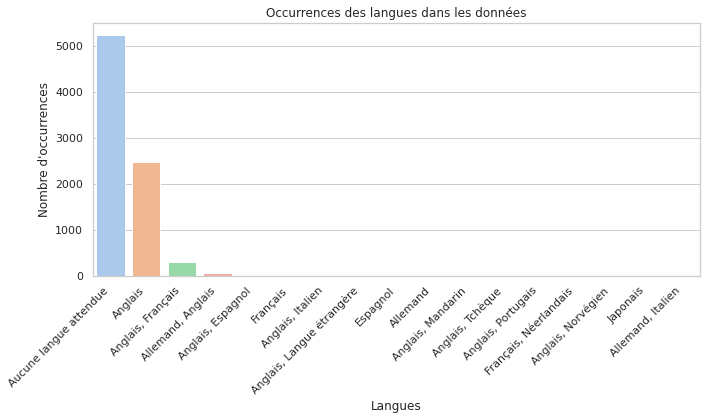

In [44]:
# Supposons que 'langue_counts' contient les comptes par langue
langue_counts = df['langues'].value_counts()

# Créer un graphique à barres avec Seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Tracer le graphique à barres
sns.barplot(x=langue_counts.index, y=langue_counts.values, palette="pastel")

# Ajouter des étiquettes aux axes et au titre
plt.xlabel('Langues')
plt.ylabel('Nombre d\'occurrences')
plt.title('Occurrences des langues dans les données')

# Faire pivoter les étiquettes de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Afficher le graphique
plt.tight_layout()
plt.show()

## Déplacement :

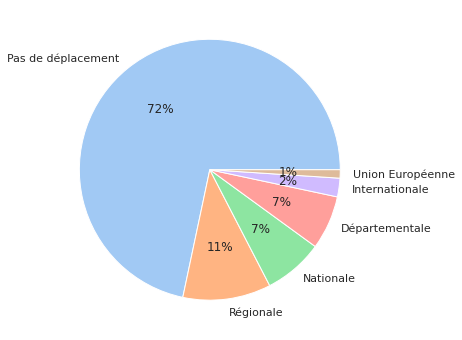

In [45]:
zone_counts = df['zone_de_deplacement'].value_counts()

#define Seaborn color palette to use
colors = sns.color_palette('pastel')
plt.figure(figsize=(10, 6))

#create pie chart
plt.pie(zone_counts.values, labels = zone_counts.index, colors = colors, autopct='%.0f%%')
plt.show()

## Télétravail :

<ipython-input-46-54952ac383bc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=teletravail_counts.index, y=teletravail_counts.values, palette="pastel")


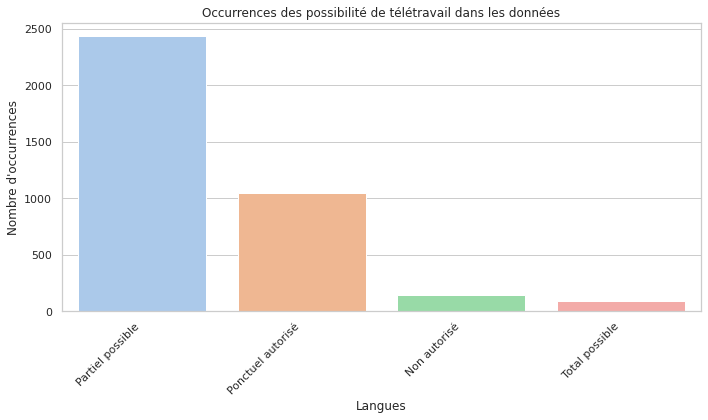

In [46]:
teletravail_counts = df['Teletravail'].value_counts()


# Créer un graphique à barres avec Seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Tracer le graphique à barres
sns.barplot(x=teletravail_counts.index, y=teletravail_counts.values, palette="pastel")

# Ajouter des étiquettes aux axes et au titre
plt.xlabel('Langues')
plt.ylabel('Nombre d\'occurrences')
plt.title('Occurrences des possibilité de télétravail dans les données')

# Faire pivoter les étiquettes de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Afficher le graphique
plt.tight_layout()
plt.show()

## Experience :

<Axes: ylabel='experience'>

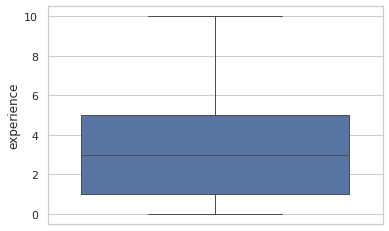

In [47]:
sns.boxplot(data=df['experience'])

In [48]:
df

,entreprise,type_contrat,deparetement,date_publication,date_mise_a_jour,salaire,prise_de_poste,experience,metier,statut_du_poste,...,Teletravail,descriptif_poste,profil_recherche,langues,savoir_etre,savoir_faire,descriptif_entreprise,nombre_posts,duree,code_postal
0,MICHAEL PAGE INTERNATIONAL FRANCE,CDI,Aix-en-Provence,2024-02-29,2024-02-29,40.0,Dès que possible,0,Développeur,Cadre du secteur privé,...,NaN,En tant que Développeur Web vos fonctions sero...,"De formation supérieure en informatique, vous ...",Aucune langue attendue,"['Autonomie', ""Capacité d'analyse"", 'Capacité ...","['Application Web', 'Développement web', 'Info...",Notre client est un éditeur de logiciels dans ...,1,None,13
1,MICHAEL PAGE INTERNATIONAL FRANCE,CDI,Rennes,2024-03-16,2024-03-16,38.5,Dès que possible,0,Développeur,Cadre du secteur privé,...,NaN,Vous intégrez une équipe agile en tant que Dév...,"Diplômé d'un Bac +5 en informatique minimum, v...",Aucune langue attendue,"['Curiosité', ""Esprit d'équipe"", 'Force de pro...","['Développement web', 'CakePHP', 'CQRS', 'DDD'...","Notre client, éditeur de logiciel dynamique, r...",1,None,35
2,Marion PINEL,CDI,Limoges,2024-02-28,2024-02-28,36.0,Dès que possible,5,Développeur,Cadre du secteur privé,...,Partiel possible,Nous recherchons un développeur web (H/F) tale...,Connaissances :\nIl/Elle dispose de très bonne...,"Anglais, Français","['Autonomie', 'Créativité', ""Esprit d'équipe"",...","['Angular JS', 'Apache', 'Application Web', 'A...","L'Office International de l'Eau (OiEau, www.oi...",1,None,87
3,SESAME IT,CDI,Paris 17,2024-02-06,2024-03-11,50.0,Dès que possible,5,Développeur,Cadre du secteur privé,...,Non autorisé,Pour venir supporter notre activité en hyper c...,Ton profil :\nDe formation Ingénieur ou diplôm...,Aucune langue attendue,"['Autonomie', 'Capacité à travailler en mode p...","['Base de données', 'Interface de programmatio...","Spécialiste de l'anticipation des menaces, Ses...",2,None,75
4,Adsearch,CDI,Rouen,2024-03-15,2024-03-15,36.5,Dès que possible,2,Développeur,Cadre du secteur privé,...,NaN,Notre client est un acteur majeur de l’héberge...,VOTRE PROFIL\nVous avez une formation Bac +3 /...,Aucune langue attendue,"['Autonomie', 'Proactivité', ""Sens de l'engage...","['Automatisme', 'Cappuccino', 'Économie', 'Fra...",Adsearch vous propose des milliers d''opportun...,1,None,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8102,Caisse Nationale de l'Assurance Maladie,CDI,Paris 20,2024-02-19,2024-02-19,NaN,Dès que possible,5,Project management officer,Cadre du secteur privé,...,NaN,Intégré(e) à l'équipe programme Mon Espace San...,Diplômé(e) ingénieur informatique ou équivalen...,Aucune langue attendue,"['Autonomie', 'Capacité à prendre des décision...","['Amélioration continue', 'Build & Release', '...",L'Assurance Maladie développe à destination de...,1,None,75
8103,CENTRE HOSPITALIER UNIVERSITAIRE REIMS,CDI,Reims,2024-02-21,2024-02-21,NaN,Dès que possible,3,Chef de projet digital,Cadre du secteur public / Armées,...,Ponctuel autorisé,Missions\nAfin de renforcer nos équipes au sei...,Profil\nEcole d’Ingénieur / BAC + 5 souhaité o...,Aucune langue attendue,"[""Capacité d'analyse"", 'Capacité d’écoute', 'C...","['Cahier des charges', 'Certification ITIL', '...","Etablissement de référence, le CHU de Reims di...",1,None,51
8104,AMARIS FRANCE SAS,CDI,Strasbourg,2024-03-04,2024-03-10,NaN,Dès que possible,3,Développeur,Cadre du secteur privé,...,NaN,Passionné(e) par le développement Java et expe...,Vos qualifications :\nPour vous épanouir en t...,Aucune langue attendue,"['Capacité à travailler en mode projet', ""Capa...","['Apache Maven', 'Amélioration continue', 'Aut...",Amaris Consulting est une société indépendante...,1,None,67
8105,1,CDI,Belgique,2024-01-23,2024-03-15,NaN,Dès que possible,8,Chef de projet travaux,Cadre du secteur privé,...,Partiel possible,La succursale belge d’Hitachi Rail renforce se...,"De formation Master, vous êtes diplômé d'un

## Entreprise : 

<ipython-input-49-20c8ba042b74>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=entreprise_counts.index, y=entreprise_counts.values, palette="pastel")


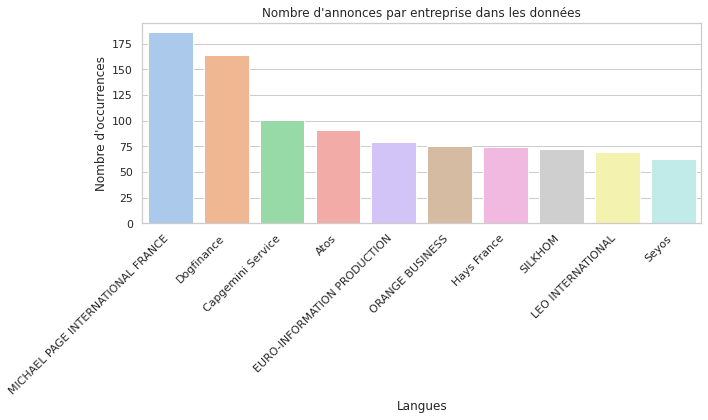

In [49]:
entreprise_counts = df['entreprise'].value_counts()[:10]
# print(entreprise_counts)

# Créer un graphique à barres avec Seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Tracer le graphique à barres
sns.barplot(x=entreprise_counts.index, y=entreprise_counts.values, palette="pastel")

# Ajouter des étiquettes aux axes et au titre
plt.xlabel('Langues')
plt.ylabel('Nombre d\'occurrences')
plt.title('Nombre d\'annonces par entreprise dans les données')

# Faire pivoter les étiquettes de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Afficher le graphique
plt.tight_layout()
plt.show()

<Axes: xlabel='metier'>

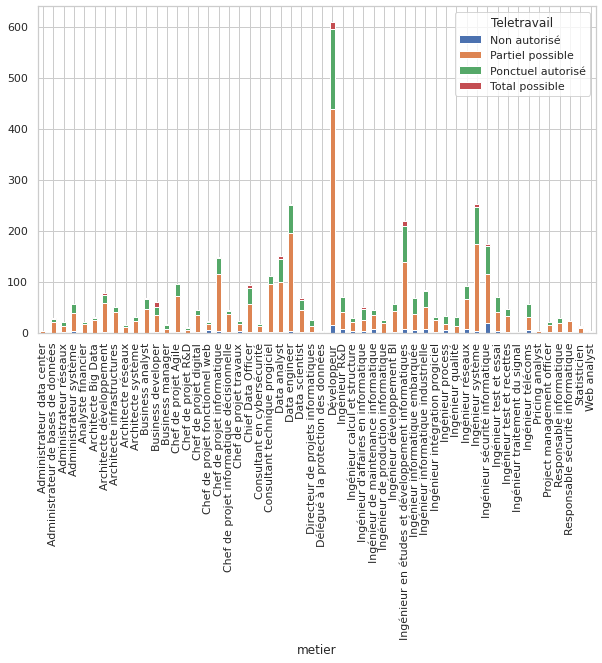

In [69]:
# Analyse de la relation entre le type de contrat et le département => Pas trés interessants 
contingency_table = pd.crosstab(df['metier'], df['Teletravail'])
contingency_table.plot(kind='bar', stacked=True,figsize=(10,6))


In [51]:
# from wordcloud import WordCloud

# # Créer un nuage de mots pour les descriptions de poste
# text = ' '.join(df['descriptif_poste'])
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
# plt.figure(figsize=(10, 6))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Nuage de mots pour les descriptions de poste')
# plt.show()

## Salaire :

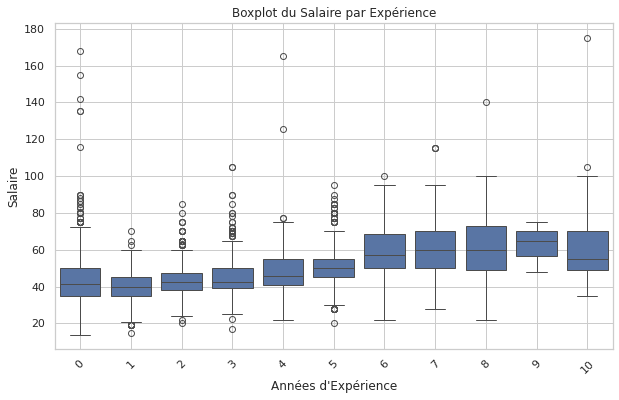

In [52]:

plt.figure(figsize=(10, 6))  # Ajustez la taille de la figure au besoin
sns.boxplot(x='experience', y='salaire', data=df)
plt.title('Boxplot du Salaire par Expérience')
plt.xlabel('Années d\'Expérience')
plt.ylabel('Salaire')
plt.xticks(rotation=45)  # Faire pivoter les étiquettes d'expérience pour une meilleure lisibilité
plt.grid(True)  # Ajouter une grille pour une meilleure visualisation
plt.show()

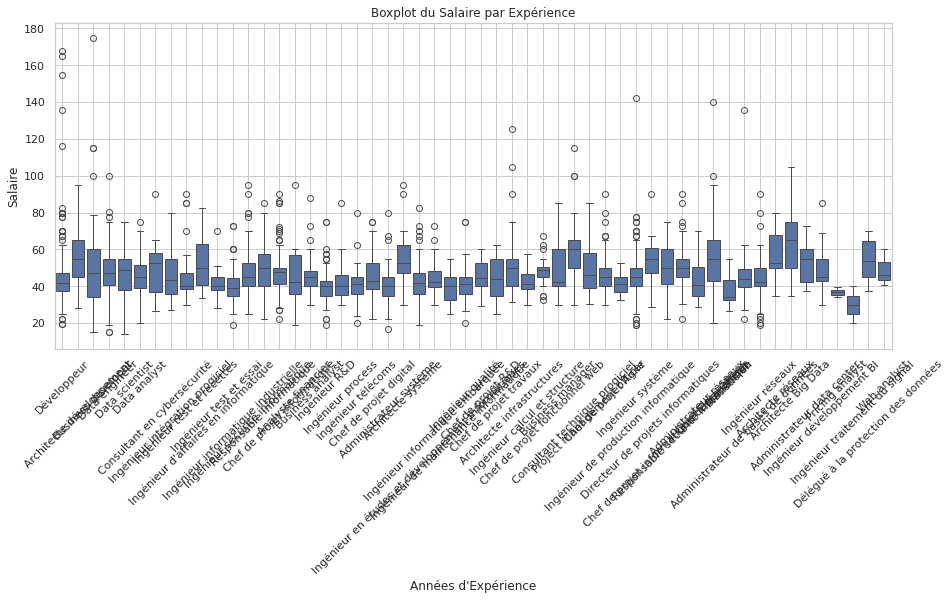

In [54]:
plt.figure(figsize=(15, 6))  # Ajustez la taille de la figure au besoin
sns.boxplot(x='metier', y='salaire', data=df)
plt.title('Boxplot du Salaire par Expérience')
plt.xlabel('Années d\'Expérience')
plt.ylabel('Salaire')
plt.xticks(rotation=45)  # Faire pivoter les étiquettes d'expérience pour une meilleure lisibilité
plt.grid(True)  # Ajouter une grille pour une meilleure visualisation
plt.show()

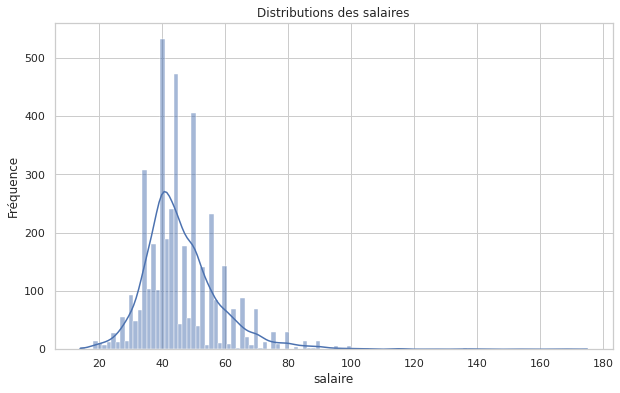

In [58]:
# Visualisation des distributions
plt.figure(figsize=(10, 6))
sns.histplot(df['salaire'], kde=True)
plt.title('Distributions des salaires')
plt.xlabel('salaire')
plt.ylabel('Fréquence')
plt.show()


## Salaire secteur privé VS public :

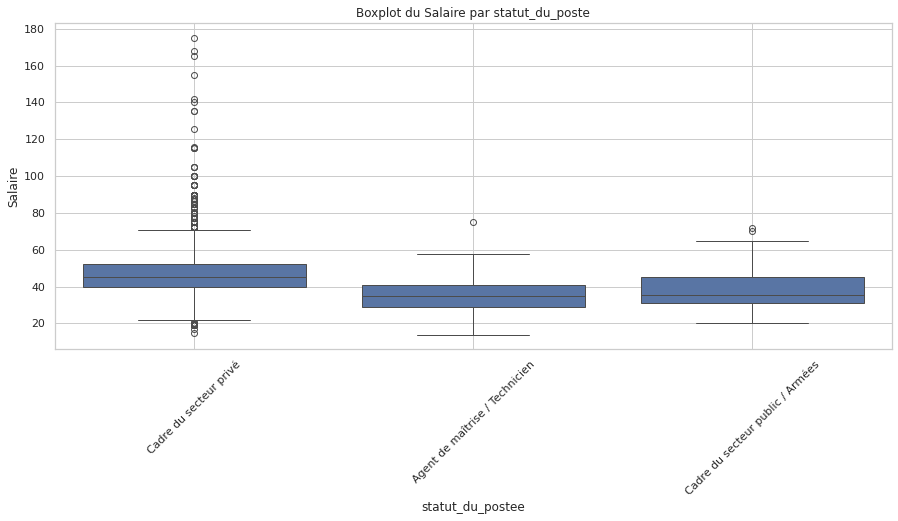

In [67]:
plt.figure(figsize=(15, 6))  # Ajustez la taille de la figure au besoin
sns.boxplot(x='statut_du_poste', y='salaire', data=df)
plt.title('Boxplot du Salaire par statut_du_poste')
plt.xlabel('statut_du_postee')
plt.ylabel('Salaire')
plt.xticks(rotation=45)  # Faire pivoter les étiquettes d'expérience pour une meilleure lisibilité
plt.grid(True)  # Ajouter une grille pour une meilleure visualisation
plt.show()